In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
mb1 = pd.read_csv("log_1mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb5 = pd.read_csv("log_5mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb10 = pd.read_csv("log_10mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb20 = pd.read_csv("log_20mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb30 = pd.read_csv("log_30mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb40 = pd.read_csv("log_40mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb50 = pd.read_csv("log_50mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb60 = pd.read_csv("log_60mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb70 = pd.read_csv("log_70mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb80 = pd.read_csv("log_80mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb90 = pd.read_csv("log_90mb.csv", names=["peerId", "method", "from", "url", "timing"])
mb100 = pd.read_csv("log_100mb.csv", names=["peerId", "method", "from", "url", "timing"])

datasets = [mb1, mb5, mb10, mb20, mb30, mb40, mb50, mb60, mb70, mb80, mb90, mb100]
allData = data = pd.concat(datasets, sort=False)

def serverResponses(dataset):
    return dataset.loc[dataset['method'] == 'serverResponse']

def peerResponses(dataset):
    return dataset.loc[dataset['method'] == 'peerResponse']

     Server Anfragen  Peer Anfragen
1           0.010175       0.080627
5           0.009800       0.465034
10          0.008720       0.971250
20          0.081087       1.556597
30          0.067965       2.258772
40          0.092372       3.259791
50          0.175003       4.434864
60          0.219885       7.781969
70          0.204029       6.705955
80          0.253756       9.262428
90          0.246466      11.838877
100         0.271817      13.688641


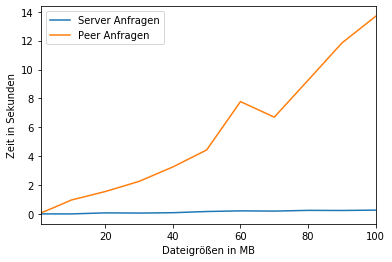

In [48]:
result = []
index = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180]

for i, dataset in enumerate(datasets):
    serverTiming = serverResponses(dataset)['timing'].mean()/1000
    peerTiming = peerResponses(dataset)['timing'].mean()/1000
    result.append([serverTiming, peerTiming])

test = pd.DataFrame(result, index=index, columns=['Server Anfragen', 'Peer Anfragen']) 
print(test)
plot = test.plot()
plot.set(xlabel="Dateigrößen in MB", ylabel="Zeit in Sekunden")
plt.savefig("Timing_file_size.pdf")


# Durchsatz

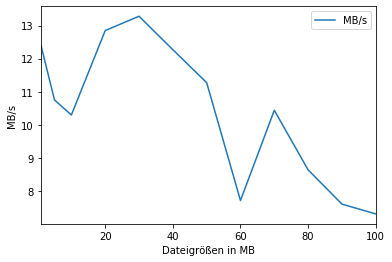

In [46]:

result = []

for i, dataset in enumerate(datasets):
    peerTiming = peerResponses(dataset)['timing'].mean()/1000
    result.append([index[i]/peerTiming])
    
test = pd.DataFrame(result, index=index, columns=['MB/s']) 
plot = test.plot()
plot.set(xlabel="Dateigrößen in MB", ylabel="MB/s")
plt.savefig("durchsatz_file_size.pdf")
